# Introductino to Artificial Neural Networks and Activation Functions

The main goal of this seminar is to introduce students to fundamental concepts of artificial neural networks (ANNs) and activation functions activation functions.

## Useful libraries and implementations imports

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datasets.dataset import WineDataset
from tensor import *
from modules import *
from activations import *
from losses import *
from optimizers import *
from datasets import *
%matplotlib inline

## Foreword

To fully implement the ANN and all operations, was decided to use the `Tensor` class. It is a wrapper over `numpy.ndarray` with some additional functionality. The main idea is to store the data and the gradient in the same object. It is useful for backpropagation algorithm. The `Tensor` class has the following attributes:
* `data` - the data of the tensor
* `grad` - the gradient of the tensor
* `requires_grad` - the flag that indicates whether the gradient should be computed
* `grad_fn` - the function that was used to compute the gradient

The `Tensor` class was designed specificly for autograd example. It is not a full-fledged implementation of tensors. It just covers the functionality that is needed for this and next seminars.

### Main concepts

Tensor is an atomic element in an autograd system. All operations are done on `Tensor` objects.

Every operation performed on specific tensor is an object of `Function` class and has the following attributes:
* `forward` - the function that performs forward pass
* `backward` - the function that performs backward pass
* `saved_tensors` - the list of tensors that are needed for backward pass

Every tensor operation is a `Function` object with specific implementation of `forward` and `backward` methods. The `forward` method takes the input tensors and returns the output tensor. The `backward` method takes the gradient of the output tensor and returns the gradient of the input tensors. The `backward` method is called recursively for every operation in the computational graph.

The every operation is a node in a computational graph. The computational graph is a directed acyclic graph (DAG) that represents the flow of data. The nodes of the graph are operations and the edges are tensors. The computational graph is used to compute the gradients using backpropagation algorithm.


## Neural networks

The neural network is a computational model that is inspired by the human brain. It consists of neurons that are connected to each other. The neurons are organized in layers. The neural network consists of the following layers:
* **Input layer** - the layer that takes the input data
* **Hidden layers** - the layers between input and output layers
* **Output layer** - the layer that produces the output data
* **Activation functions** - the functions that are applied to the output of the layers

![Perceptron](./images/perceptron.png)

Neural networks can consist of different layers. The most popular layers are:
* **Linear (Fully-connected) layer** - the layer that connects every neuron from the previous layer to every neuron in the next layer
* **Convolutional layer** - the layer that performs convolution operation on the input data
* **Pooling layer** - the layer that performs pooling operation on the input data
* **Recurrent layer** - the layer that performs recurrent operation on the input data
* etc.

## Activation functions

The short description of activation functions:
* **Sigmoid** - squashes numbers to range [0, 1]. It is useful in the output layer of binary classification problems.
$$sigmoid(z) = \frac{1} {1 + e^{-z}}$$
* **ReLU** - squashes numbers to range [0, inf). It is the most popular activation function in deep learning. It is used in the hidden layers of neural networks.
$$ReLU(z) = max(0, z)$$
* **Tanh** - squashes numbers to range [-1, 1]. It is used in the hidden layers of neural networks.
$$tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}} = \frac{1 - e^{-2x}}{1 + e^{-2x}}$$

<IPython.core.display.Javascript object>

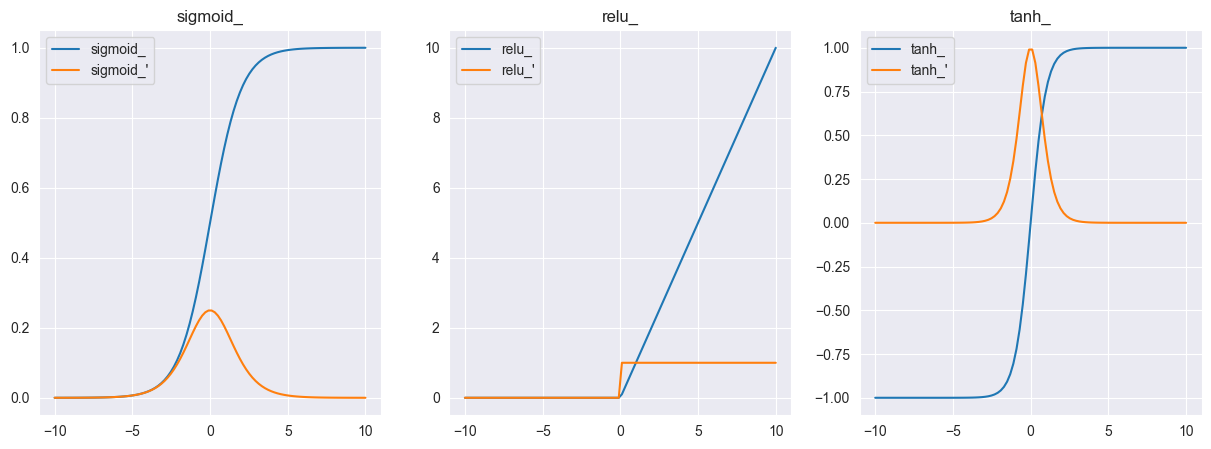

In [9]:
x = np.linspace(-10, 10, 100).reshape(1, -1)

x_t = Tensor(x, requires_grad=True)

activations = [sigmoid_, relu_, tanh_]

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i, activation in enumerate(activations):
    y = activation(x_t)
    y.backward()
    ax[i].plot(x_t.data[0], y.data[0], label=activation.__name__)
    ax[i].plot(x_t.data[0], x_t.grad[0], label=f'{activation.__name__}\'')
    ax[i].set_title(activation.__name__)
    x_t.clear_grad()
    ax[i].legend()
plt.show()


## Benchmarking activation functions

In [24]:
from time import perf_counter

def time_wrapper(fn):
    def wrapper(*args, **kwargs):
        start = perf_counter()
        result = fn(*args, **kwargs)
        end = perf_counter()
        print(f'{fn.__name__} took {end - start} seconds')
    return wrapper

In [27]:
x = np.linspace(-10, 10, 100).reshape(1, -1)
time_wrapper(sigmoid_)(Tensor(x))
time_wrapper(tanh_)(Tensor(x))
time_wrapper(relu_)(Tensor(x))

sigmoid_ took 2.7802001568488777e-05 seconds
tanh_ took 9.219998901244253e-06 seconds
relu_ took 1.0166000720346346e-05 seconds


Advantages and disadvantages of activation functions:
* **Sigmoid** - it is differentiable everywhere, but it has vanishing gradient problem. It means that the gradient of the sigmoid function is close to zero for large positive and negative values. It leads to the slow learning process.
* **ReLU** - it is not differentiable at zero, but it is differentiable everywhere else. It is computationally effective as it involves simpler mathematical operations than sigmoid and tanh. It doesn't suffer from the vanishing gradient problem. 
* **Tanh** - it is differentiable everywhere, but it has vanishing gradient problem. It is similar to sigmoid function, but it is zero-centered. It means that the mean of the output is close to zero. It leads to faster learning process.


## Training neural networks

The neural network is a universal function approximator. It means that it can approximate any function. The neural network is a composition of differentiable functions. It means that the neural network is differentiable. It allows to use gradient-based optimization algorithms to train the neural network.

The training process consists of the following steps:
1. Forward pass - the input data is passed through the neural network and the output is computed
2. Loss computation - the loss function is used to compute the loss between the output and the target
3. Backward pass - the gradient of the loss is computed using backpropagation algorithm
4. Parameters update - the parameters of the neural network are updated using the gradient descent algorithm
5. Repeat steps 1-4 until the loss is small enough

### Loss functions

The loss function is a function that is used to compute the loss between the output and the target. The loss function is a part of the neural network. It is a differentiable function. It allows to compute the gradient of the loss function with respect to the output of the neural network. The most popular loss functions are:
* **Mean Squared Error (MSE)** - the loss function that is used for regression problems
$$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2$$
* **Binary Cross Entropy (BCE)** - the loss function that is used for binary classification problems
$$BCE = -\frac{1}{n} \sum_{i=1}^{n} y_i \log(\hat{y_i}) + (1 - y_i) \log(1 - \hat{y_i})$$
* **Cross Entropy (CE)** - the loss function that is used for multi-class classification problems
$$CE = -\frac{1}{n} \sum_{i=1}^{n} \sum_{j=1}^{m} y_{ij} \log(\hat{y_{ij}})$$
* etc.


### Backpropagation algorithm

The backpropagation algorithm is an algorithm that is used to compute the gradient of the loss function with respect to the parameters of the neural network. The backpropagation algorithm is based on the chain rule of calculus. The chain rule is used to compute the gradient of the loss function with respect to the output of the neural network. The gradient of the loss function with respect to the output of the neural network is used to compute the gradient of the loss function with respect to the parameters of the neural network.
The popular optimization algorithms are:

* **Stochastic Gradient Descent (SGD)** - the optimization algorithm that is used to update the parameters of the neural network using a single example
$$\theta_{t+1} = \theta_t - \alpha \nabla_{\theta} L(\theta_t)$$
* **RMSProp** - the optimization algorithm that is used to update the parameters of the neural network using adaptive learning rate
$$E[g^2]_t = \beta E[g^2]_{t-1} + (1 - \beta) g^2_t$$
* **Adam** - the optimization algorithm that is used to update the parameters of the neural network using adaptive learning rate
$$m_t = \beta_1 m_{t-1} + (1 - \beta_1) g_t$$
* **AdaGrad** - the optimization algorithm that is used to update the parameters of the neural network using adaptive learning rate
$$G_t = G_{t-1} + g_t^2$$
* etc.

## Implementation of neural network

In [10]:
class WiNET(Module):
    def __init__(self, in_features, out_features, hidden_features=None):
        super().__init__()
        if hidden_features is None:
            hidden_features = out_features
        self.linear1 = Linear(in_features, hidden_features)
        self.linear2 = Linear(hidden_features, hidden_features)
        self.linear3 = Linear(hidden_features, out_features)
        self.activation = ReLU()

    def forward(self, x):
        x = self.linear1(x)
        x = self.activation(x)
        x = self.linear2(x)
        x = self.activation(x)
        x = self.linear3(x)
        return x


## Wine dataset

In [11]:
wine_df = pd.read_csv('../data/wine/winequality-red.csv')
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [12]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Let's do some plotting to know how the data columns are distributed in the dataset

IndexError: index 3 is out of bounds for axis 0 with size 3

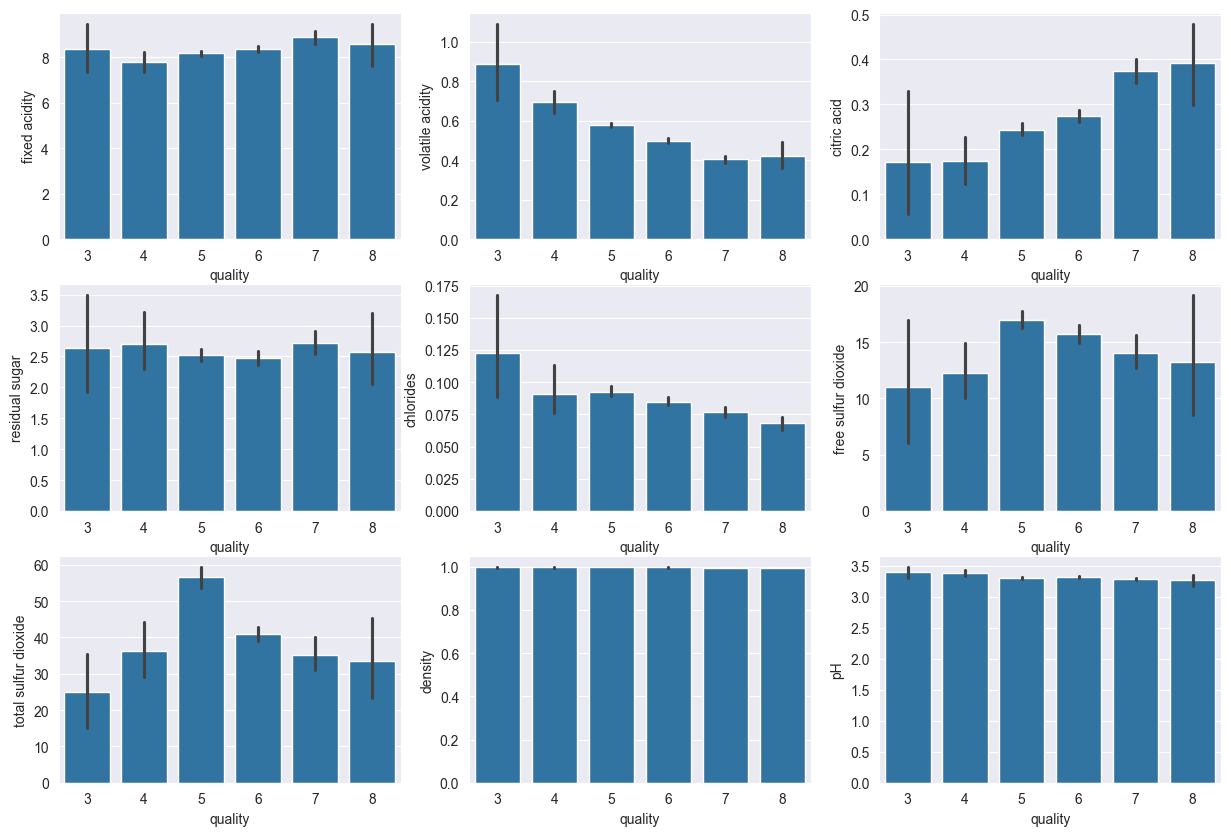

In [13]:
import seaborn as sns

columns = list(filter(lambda col: col != 'quality', wine_df.columns.tolist()))
fig, ax = plt.subplots(3, 3, figsize=(15, 10))
for i, column in enumerate(columns):
    sns.barplot(x='quality', y=column, data=wine_df, ax=ax[i // 3, i % 3])
plt.show()

### Apply scaling to the dataset and split it into train and test sets:

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Y = wine_df['quality']
X = wine_df.drop('quality', axis=1)

scaler = StandardScaler()
X = scaler.fit_transform(X)
Y = scaler.fit_transform(Y.values.reshape(-1, 1))

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=42)
train_ds = WineDataset((X_train, Y_train))
test_ds = WineDataset((X_test, Y_test))
train_dl = DataLoader(train_ds, shuffle=True)
test_dl = DataLoader(test_ds, shuffle=True)

## Training neural network on Wine dataset

In [15]:
INPUT_FEATURES = X.shape[1]
OUTPUT_FEATURES = 1
HIDDEN_FEATURES = 4

In [16]:
from utils import setup_logger
import os

logger = setup_logger("train_logger", "train.log")
stats = {
    "losses": {
        "train": [],
        "validation": []
    },
    "accuracies": {
        "train": [],
        "validation": []
    }
}
epochs = 20
save_state_frequency = 1
min_save_epoch = 0
weights_dir = "../weights/wine"

if not os.path.exists(weights_dir):
    os.makedirs(weights_dir)
model = WiNET(INPUT_FEATURES, OUTPUT_FEATURES, HIDDEN_FEATURES)
optimizer = SGD(model, lr=1e-5)
loss_fn = MSE()

  0%|          | 0/20 [00:00<?, ?it/s]

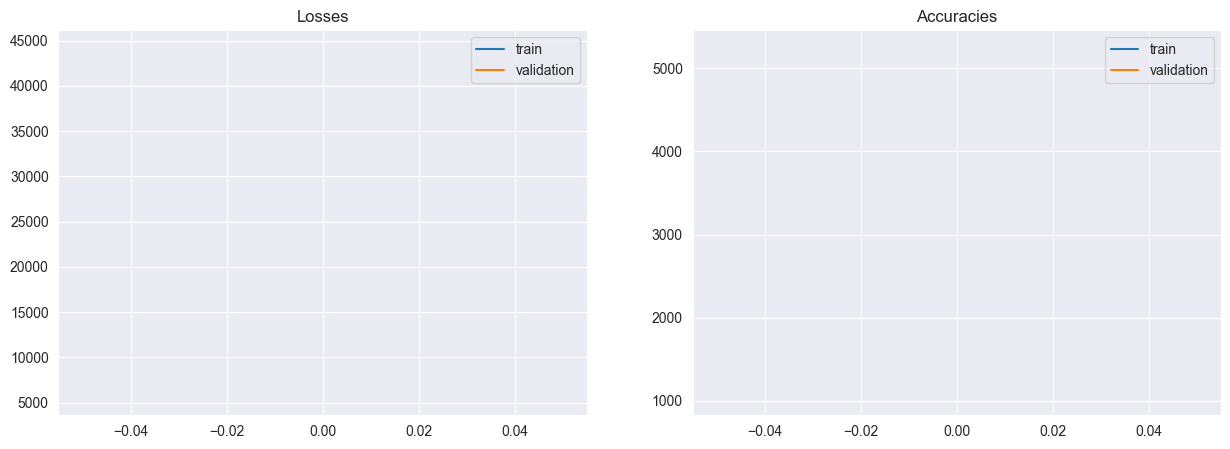

  5%|▌         | 1/20 [00:00<00:07,  2.42it/s]

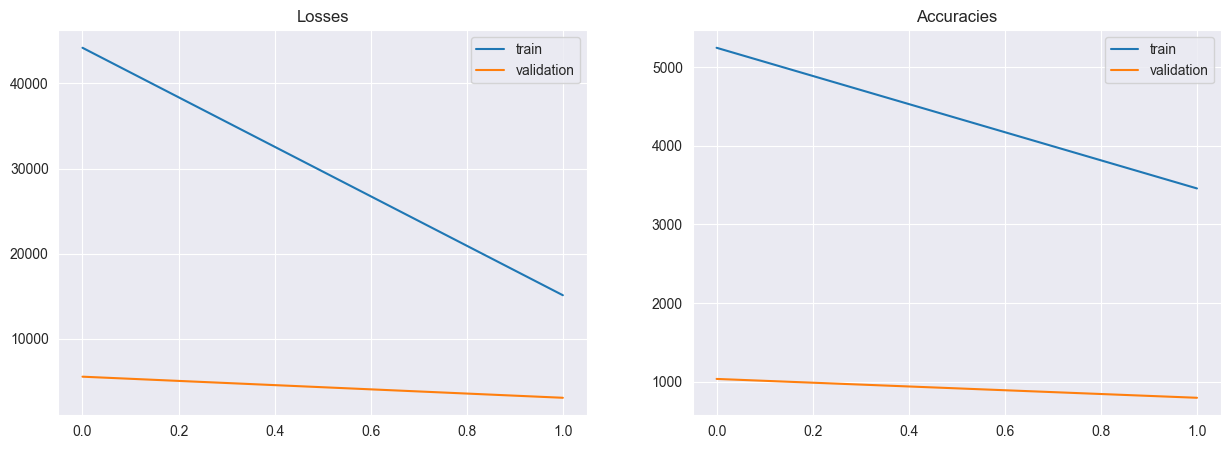

 10%|█         | 2/20 [00:00<00:07,  2.45it/s]

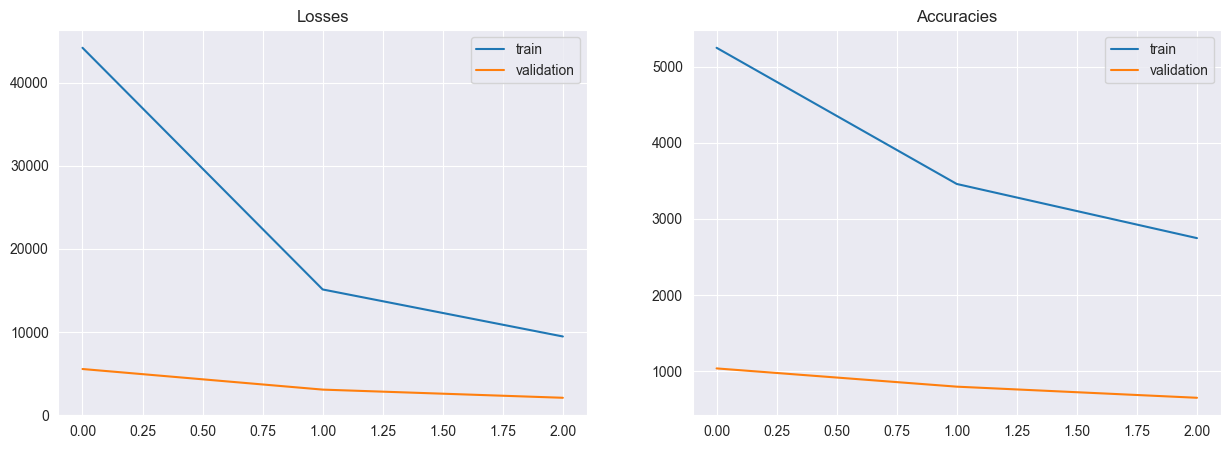

 15%|█▌        | 3/20 [00:01<00:07,  2.37it/s]

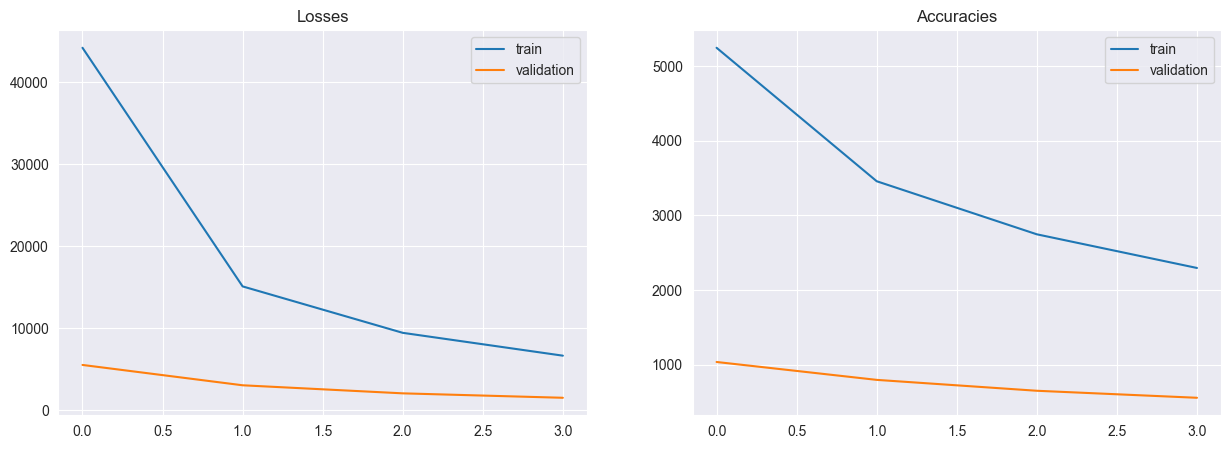

 20%|██        | 4/20 [00:01<00:08,  2.00it/s]

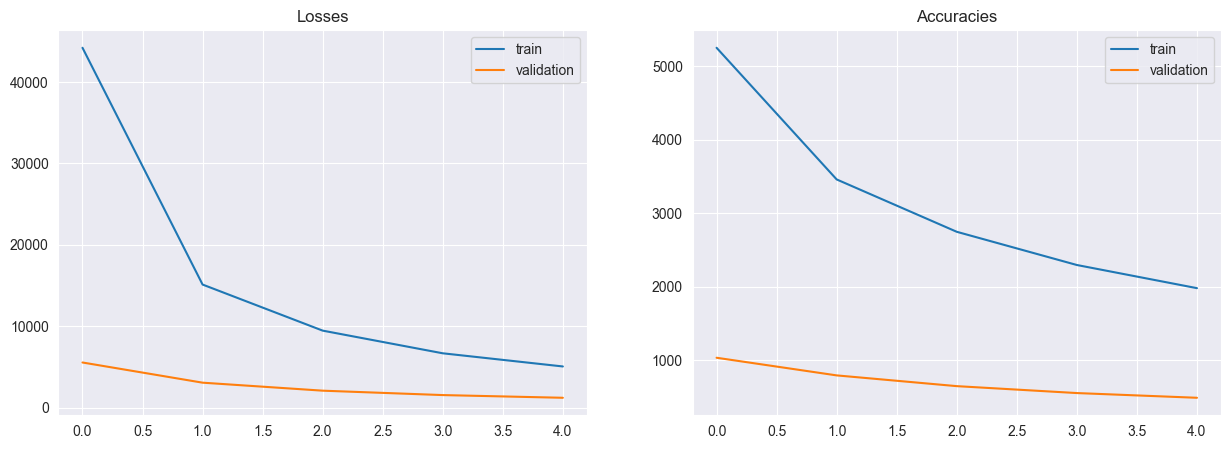

 25%|██▌       | 5/20 [00:02<00:06,  2.15it/s]

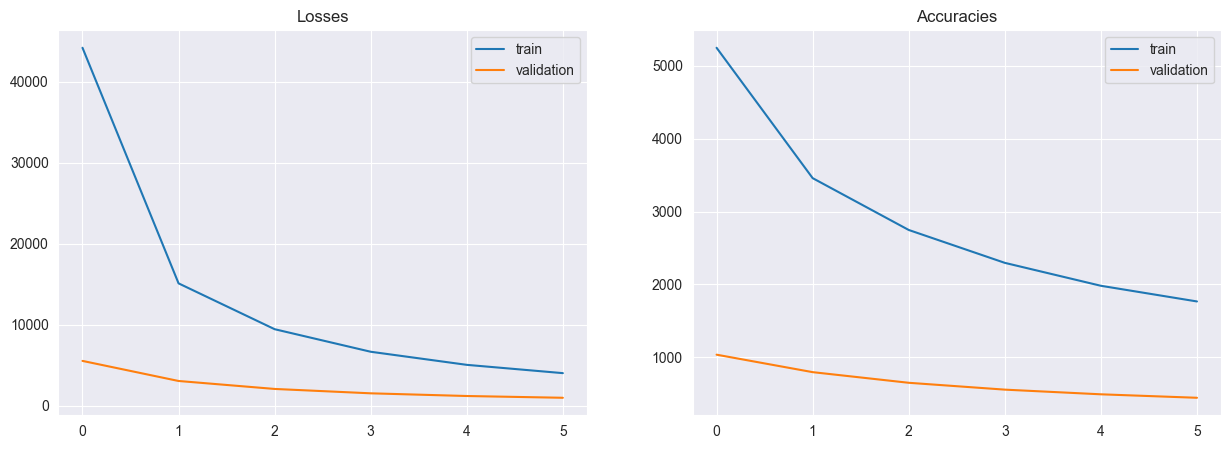

 30%|███       | 6/20 [00:02<00:06,  2.23it/s]

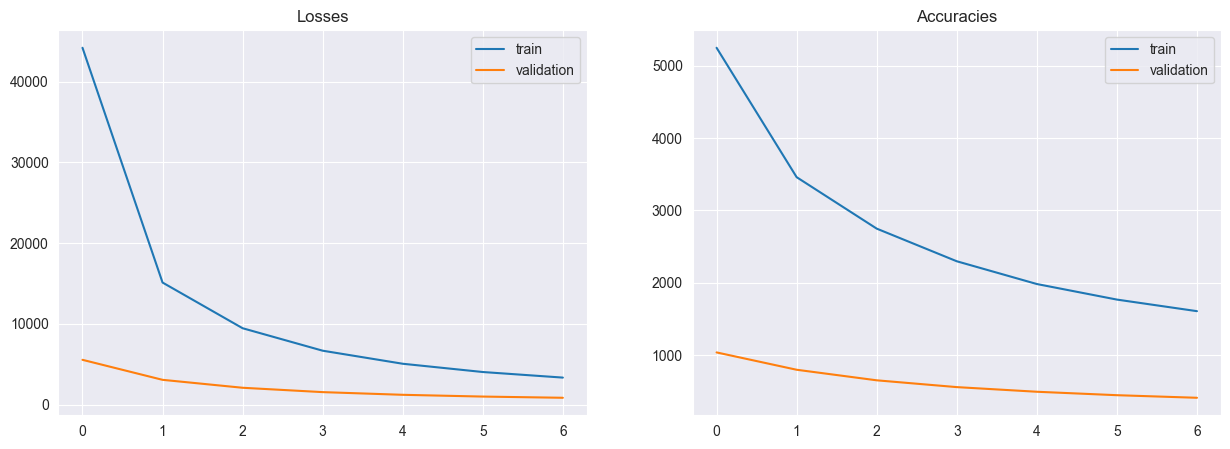

 35%|███▌      | 7/20 [00:03<00:05,  2.30it/s]

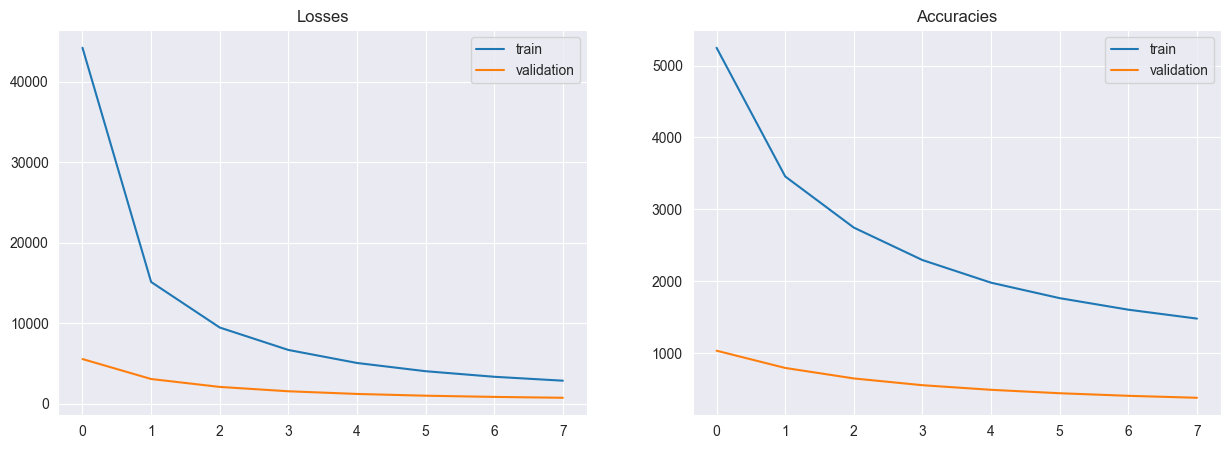

 40%|████      | 8/20 [00:03<00:05,  2.31it/s]

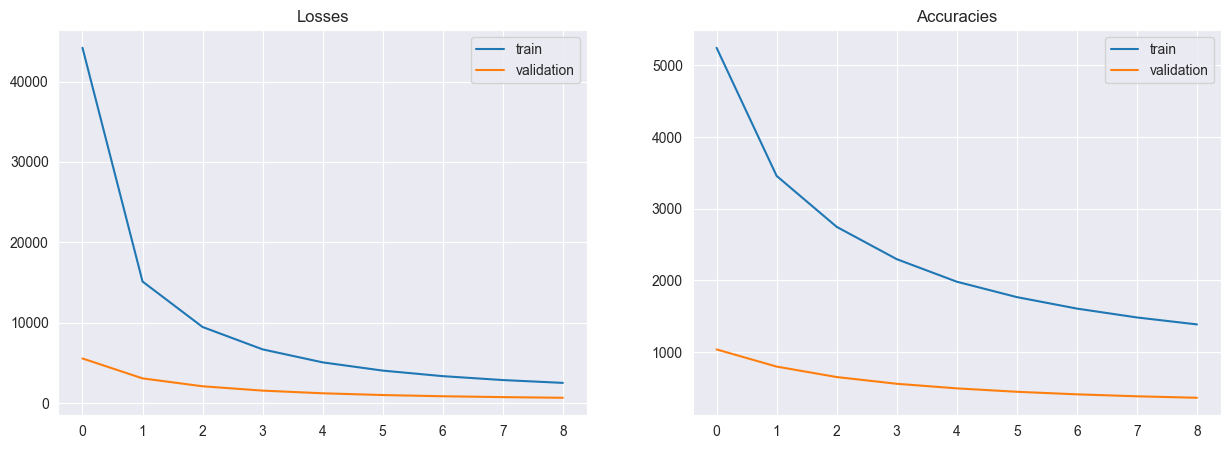

 45%|████▌     | 9/20 [00:03<00:04,  2.32it/s]

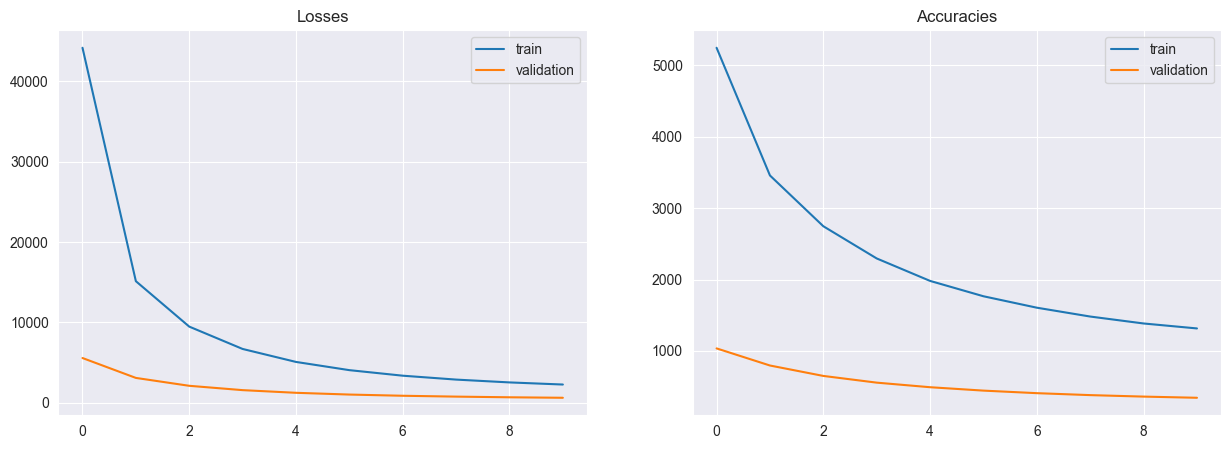

 50%|█████     | 10/20 [00:04<00:04,  2.32it/s]

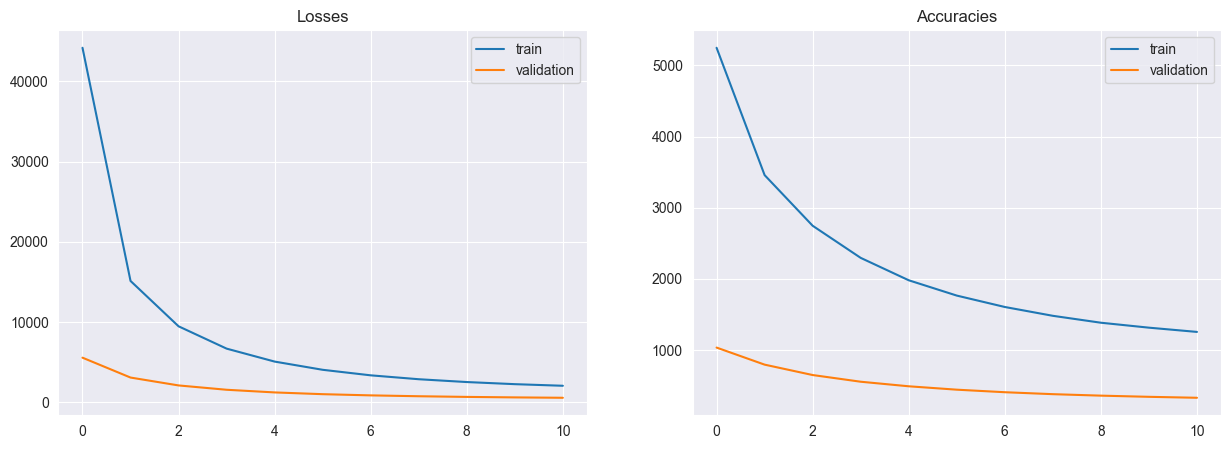

 55%|█████▌    | 11/20 [00:04<00:03,  2.38it/s]

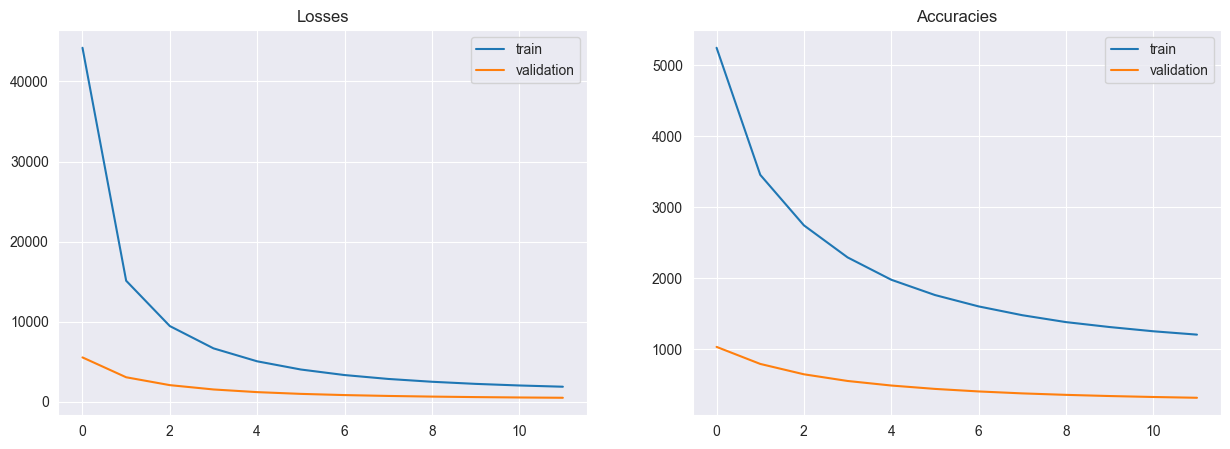

 60%|██████    | 12/20 [00:05<00:03,  2.39it/s]

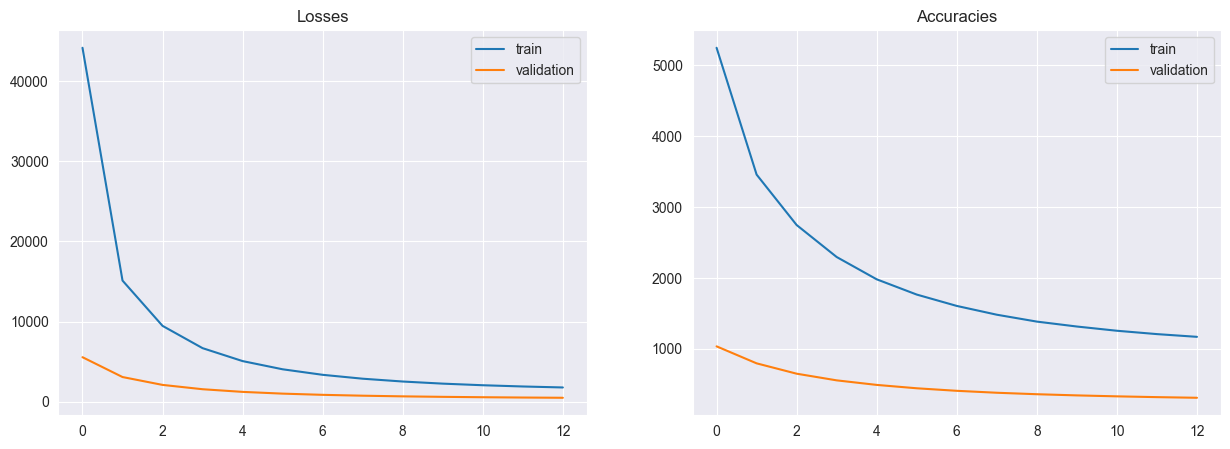

 65%|██████▌   | 13/20 [00:05<00:02,  2.39it/s]

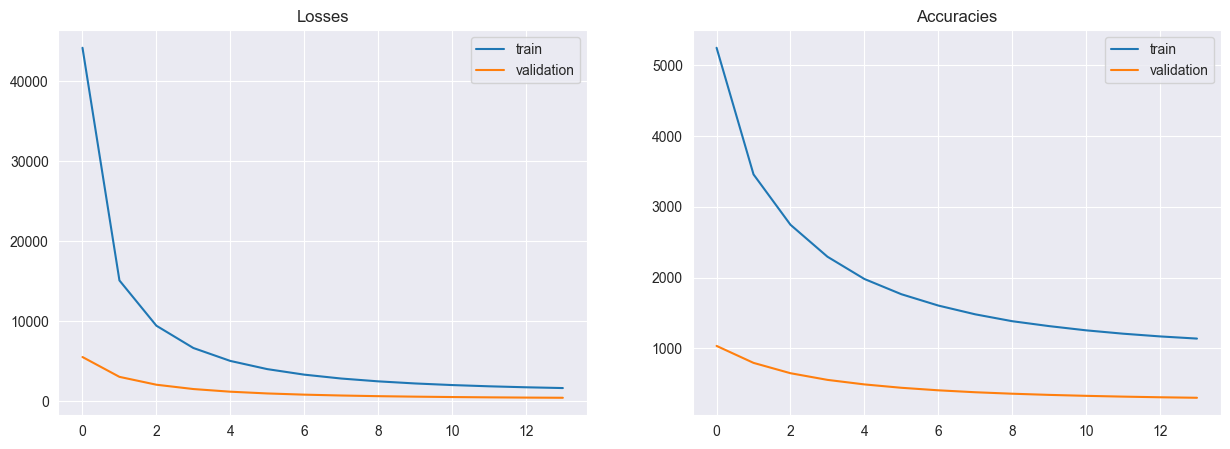

 70%|███████   | 14/20 [00:06<00:02,  2.39it/s]

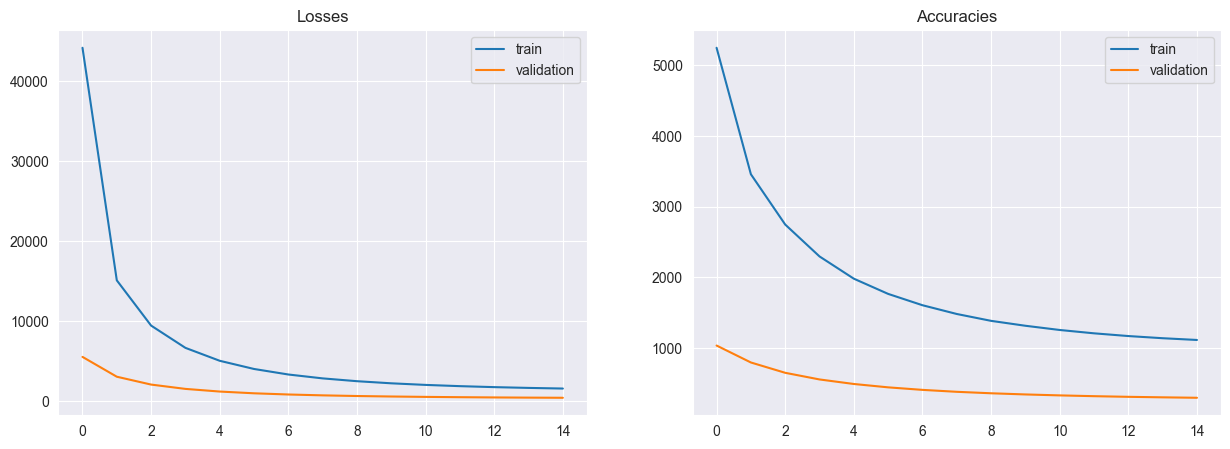

 75%|███████▌  | 15/20 [00:06<00:02,  2.30it/s]

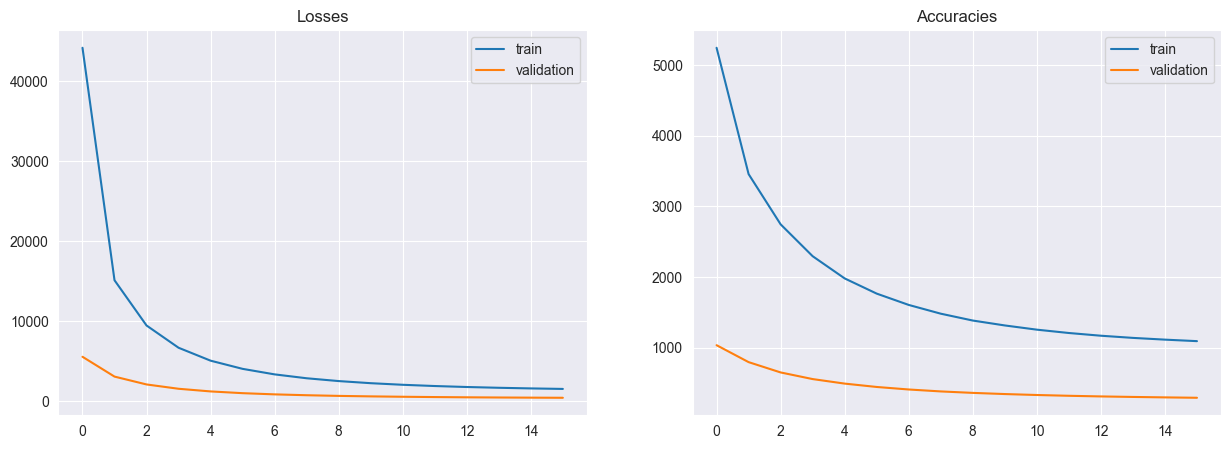

 80%|████████  | 16/20 [00:06<00:01,  2.27it/s]

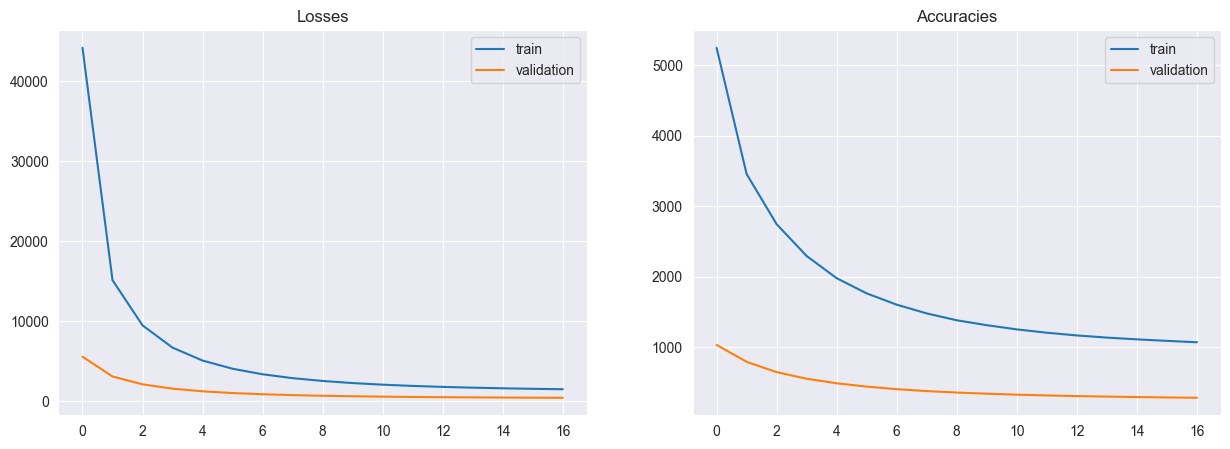

 85%|████████▌ | 17/20 [00:07<00:01,  2.19it/s]

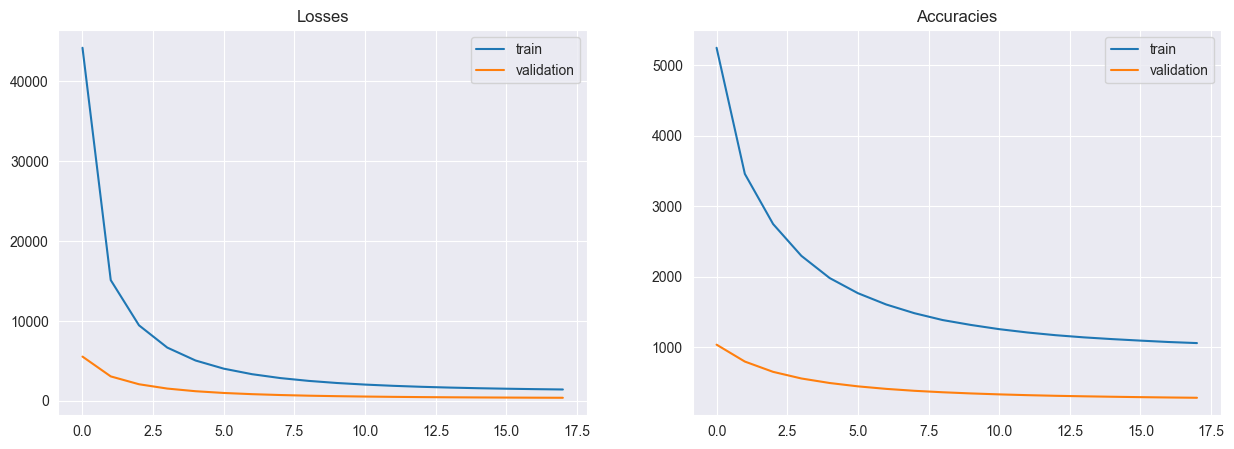

 90%|█████████ | 18/20 [00:07<00:00,  2.09it/s]

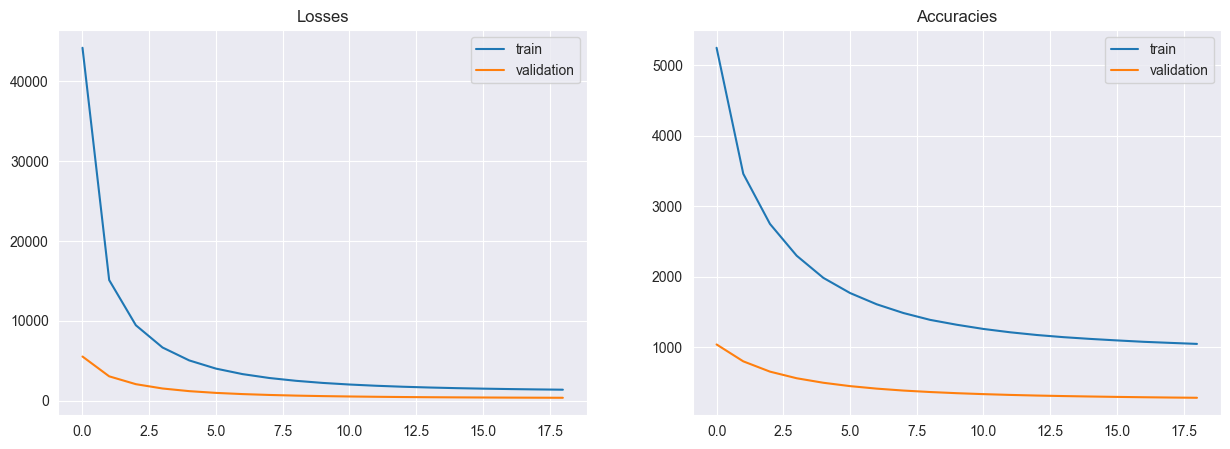

 95%|█████████▌| 19/20 [00:08<00:00,  2.17it/s]

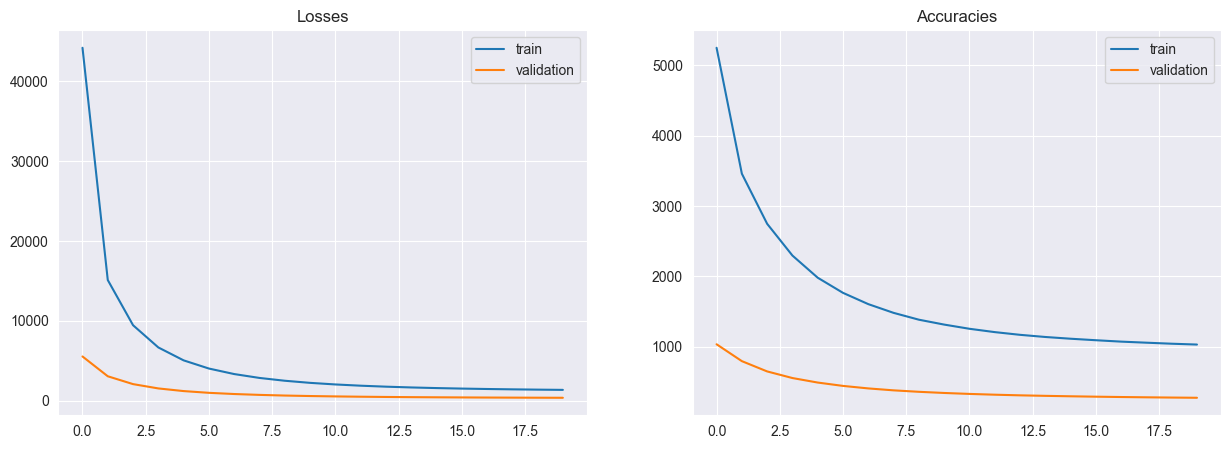

100%|██████████| 20/20 [00:08<00:00,  2.27it/s]


In [17]:
from core import train
from core.evaluations import *

train(model=model, optimizer=optimizer, loss_fn=loss_fn, dataloaders=(train_dl, test_dl),metric_fn=mae, epochs=epochs, stats=stats,
      logger=logger, weights_dir=weights_dir, save_state_frequency=save_state_frequency, min_save_epoch=min_save_epoch)

In [18]:
prediction = model(Tensor(X_test)).detach()
results = pd.DataFrame({'prediction': prediction.data.reshape(-1), 'target': Y_test.reshape(-1)})
results.head()

,prediction,target
0,-0.568644,0.450848
1,-0.024365,-0.787823
2,-0.325200,0.450848
3,0.394906,-0.787823
4,-0.022100,0.450848


# Conclusion

In this work was implemented the neural network from scratch using only `numpy` library. The neural network was trained on the wine dataset. The neural network was trained using the backpropagation algorithm and gradient descent optimization algorithm. The neural network was trained to predict the quality of the wine. The neural network was trained to minimize the mean squared error loss function. The neural network was trained for 20 epochs. The neural network was trained using the stochastic gradient descent optimization algorithm with learning rate 1e-5. The neural network was trained using the mean squared error loss function.

Also was done the benchmarking of the activation functions. The sigmoid, tanh and ReLU activation functions were benchmarked. The ReLU activation function was the fastest. The tanh activation function was the slowest. The sigmoid activation function was in the middle.
Each of the activation functions has its own advantages and disadvantages. The sigmoid activation function is differentiable everywhere, but it has vanishing gradient problem. The ReLU activation function is not differentiable at zero, but it is differentiable everywhere else. The tanh activation function is differentiable everywhere, but it has vanishing gradient problem. There are many other activation functions. Each of them has its own advantages and disadvantages. The choice of the activation function depends on the task.
E. g. the sigmoid activation function is used in the output layer of binary classification problems. The ReLU activation function is used in the hidden layers of neural networks. The tanh activation function is used in the hidden layers of neural networks.